In [49]:
pip install networkx


Note: you may need to restart the kernel to use updated packages.


In [50]:
import networkx as nx
import numpy as np


In [51]:
g1 = nx.Graph()
g2 = nx.DiGraph()
g3 = nx.MultiGraph()
g4 = nx.MultiDiGraph()

In [52]:
g1.add_node(1)
print(g1)
g1.add_nodes_from([2,3,4,5])
print(g1)


Graph with 1 nodes and 0 edges
Graph with 5 nodes and 0 edges


In [53]:
g1.add_edge(6,7)
g1.add_edge(1,2)
print(g1)

Graph with 7 nodes and 2 edges


In [54]:
g1.add_edges_from([(2,3),(4,5),(3,4)])
print(g1)

Graph with 7 nodes and 5 edges


In [55]:
g1.add_edge(4,5,weight=2)
g1.add_edge(5,6,friends = True)
g1.add_edge(7,1,weight=5,friends=False)
print(g1)

Graph with 7 nodes and 7 edges


In [56]:
print(g1[1])
print(g1[7][1])


{2: {}, 7: {'weight': 5, 'friends': False}}
{'weight': 5, 'friends': False}


In [57]:
print(g1.nodes)
print(g1.edges)

[1, 2, 3, 4, 5, 6, 7]
[(1, 2), (1, 7), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]


In [58]:
print(g1.edges.data())

[(1, 2, {}), (1, 7, {'weight': 5, 'friends': False}), (2, 3, {}), (3, 4, {}), (4, 5, {'weight': 2}), (5, 6, {'friends': True}), (6, 7, {})]


In [59]:
print(g1.edges.data("weight"))

[(1, 2, None), (1, 7, 5), (2, 3, None), (3, 4, None), (4, 5, 2), (5, 6, None), (6, 7, None)]


In [60]:
print(g1.edges[7,1]["weight"])

5


In [61]:
g1.remove_node(3)
print(g1)


Graph with 6 nodes and 5 edges


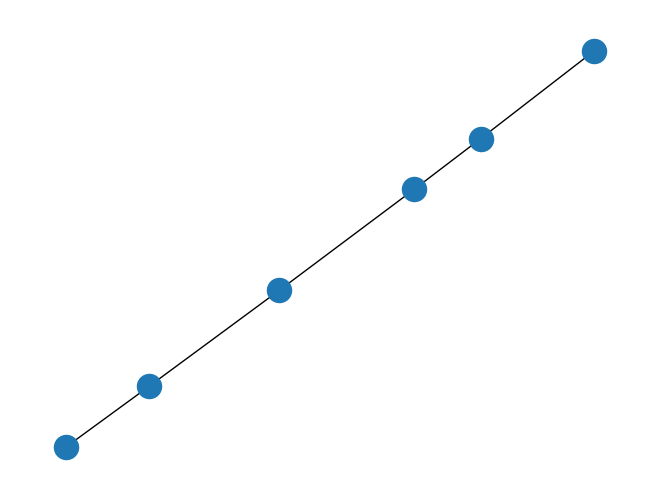

In [62]:
nx.draw(g1)

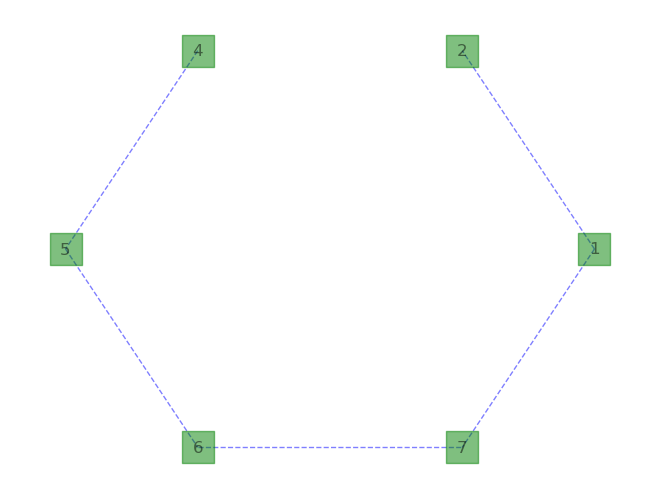

In [63]:
nx.draw(g1,pos=nx.circular_layout(g1), node_color = "g", edge_color='b', with_labels=True,node_size=500,node_shape='s',alpha=0.5,style='--' )

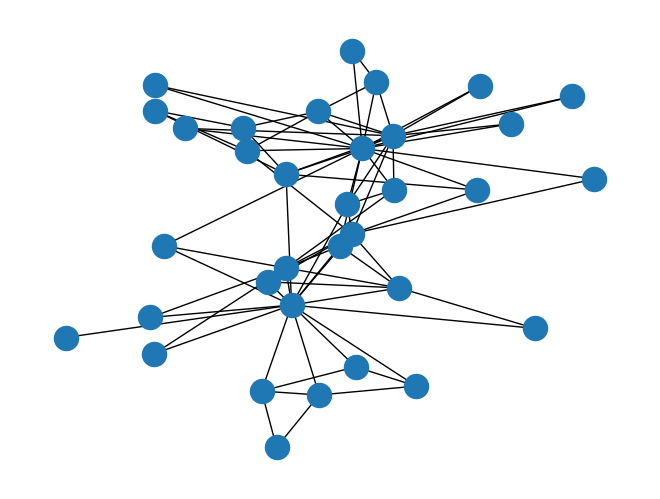

In [64]:
G = nx.karate_club_graph()
nx.draw(G)

In [65]:
print(G.nodes)
print(G.degree[0])
print(G.degree())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
16
[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


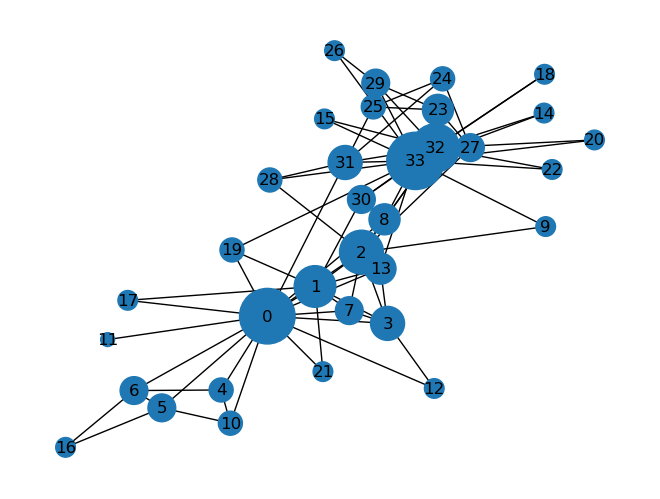

In [66]:
nx.draw(G,node_size = [G.degree(i)*100 for i in G.nodes],with_labels=True)

In [67]:
#max degree
degree_sequence = sorted((d for n,d in G.degree()),reverse=True)
dmax = max(degree_sequence)
print(dmax)
print(degree_sequence)

17
[17, 16, 12, 10, 9, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]


In [68]:
degree_sequence_unique = np.unique(degree_sequence,return_counts=True)
print(degree_sequence_unique)

(array([ 1,  2,  3,  4,  5,  6,  9, 10, 12, 16, 17]), array([ 1, 11,  6,  6,  3,  2,  1,  1,  1,  1,  1], dtype=int64))


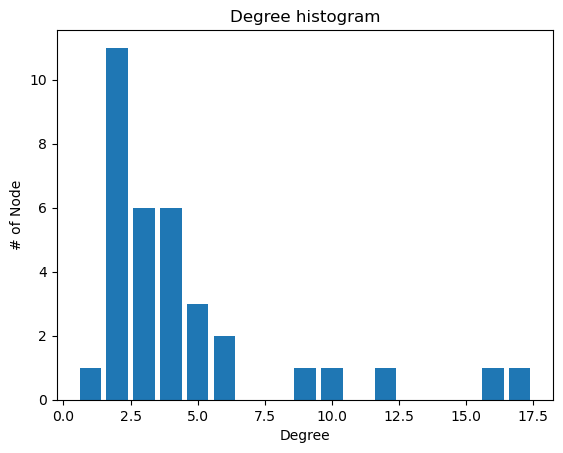

In [69]:
import matplotlib.pyplot as plt
plt.bar(degree_sequence_unique[0],degree_sequence_unique[1])
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Node")
plt.show()

In [70]:
probs = [ d/sum(degree_sequence_unique[1]) for d in degree_sequence_unique[1] ]
print(probs)
print(sum(probs))

[0.029411764705882353, 0.3235294117647059, 0.17647058823529413, 0.17647058823529413, 0.08823529411764706, 0.058823529411764705, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353]
1.0


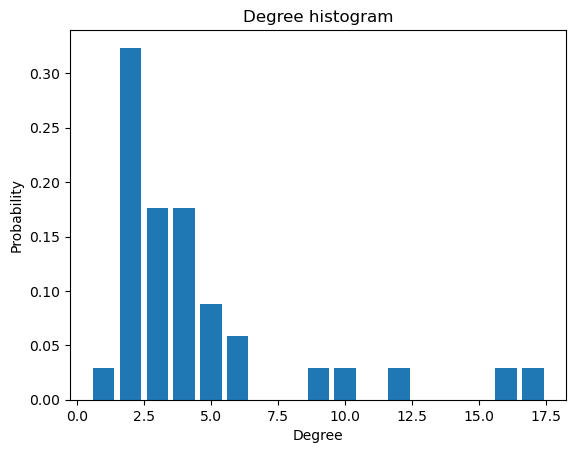

In [71]:
plt.bar(degree_sequence_unique[0],probs)
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.show()

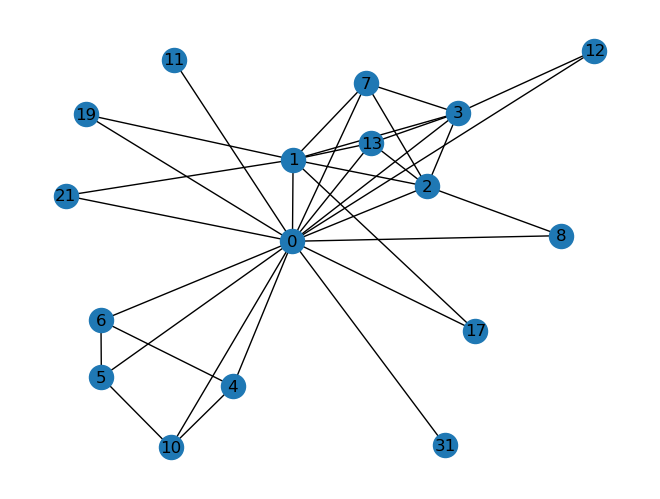

In [72]:
one_hop_nbrs = nx.ego_graph(G,0,radius =1,center=True,undirected=True)
nx.draw(one_hop_nbrs,with_labels=True)

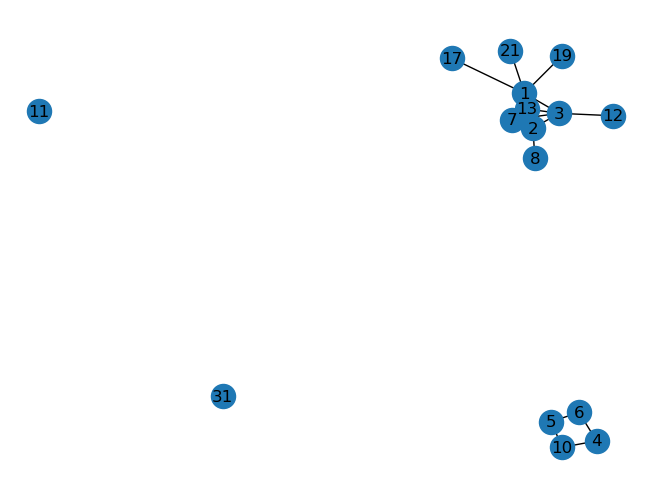

In [73]:
nodes = list(one_hop_nbrs.nodes())
nodes.remove(0)
one_hop_nbrs_subgraph = G.subgraph(nodes)
nx.draw(one_hop_nbrs_subgraph,with_labels=True)

In [74]:
#Clustering Coefficient
actual_edges = len(one_hop_nbrs_subgraph.edges())
n = len(nodes)
possible_edges = (n*(n-1))/2
print(actual_edges,possible_edges)


18 120.0


In [75]:
cc = actual_edges/possible_edges
print(cc)

0.15


In [76]:
print(nx.clustering(G,0))

0.15


In [77]:
print(nx.clustering(G))

{0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}


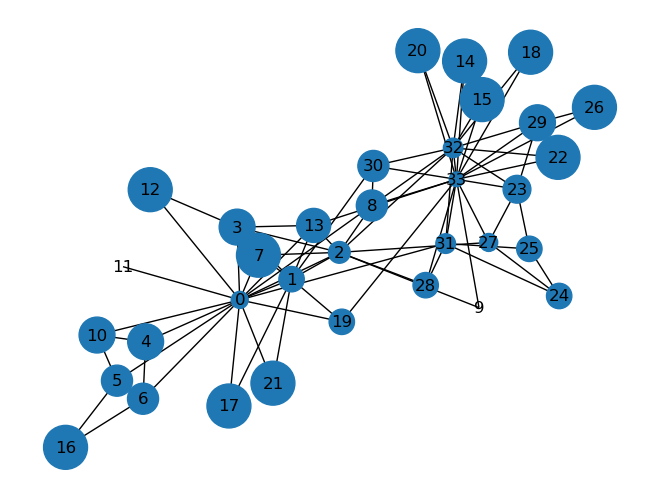

In [118]:
nx.draw(G,node_size = [nx.clustering(G,i)*1000 for i in G.nodes],with_labels=True)

In [80]:
#Degree Centrality
deg_0 = G.degree(0)
n = len(G)
print(deg_0,n)

16 34


In [81]:
dc = deg_0/(n-1)
print(dc)

0.48484848484848486


In [143]:
print(nx.degree_centrality(G))

{0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}


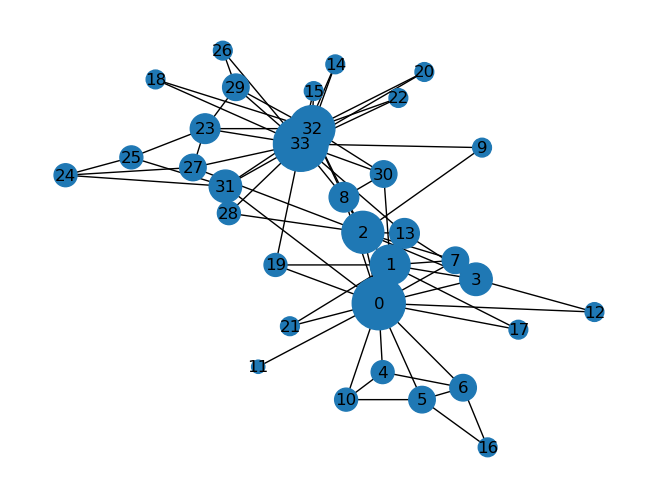

In [83]:
nx.draw(G,node_size=[i*3000 for i in nx.degree_centrality(G).values()],with_labels=True )

In [84]:
#Closeness Centrality

N= len(G.nodes)
nodes = G.nodes
sum_deg_0 = 0
for n in nodes:
    if n!=0:
        sum_deg_0 += nx.shortest_path_length(G,source=0,target=n)
print(N,sum_deg_0)

34 58


In [85]:
cc = (N-1)/sum_deg_0
print(cc)

0.5689655172413793


In [86]:
print(nx.closeness_centrality(G))

{0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}


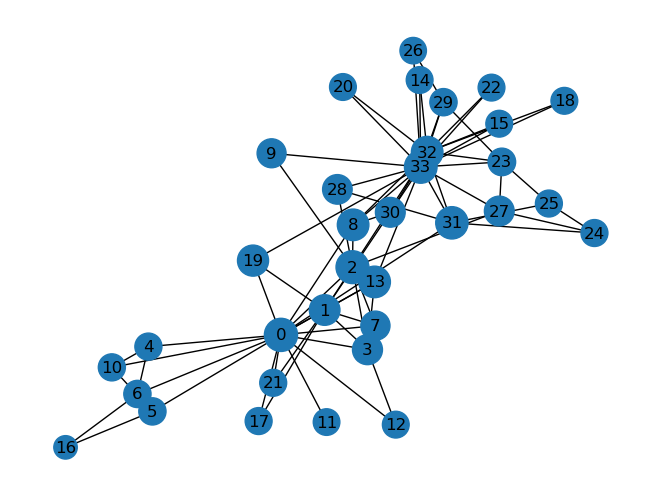

In [145]:
nx.draw(G,node_size=[i*1000 for i in nx.closeness_centrality(G).values()],with_labels=True)

In [88]:
#betweenness Centrality
print(nx.betweenness_centrality(G))

{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}


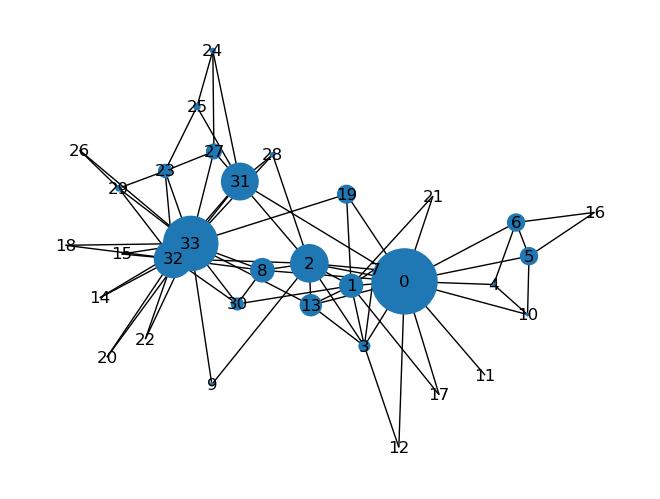

In [89]:
nx.draw(G,node_size=[i*5000 for i in nx.betweenness_centrality(G).values()],with_labels=True)

In [90]:
print(nx.pagerank(G))

{0: 0.08850807396280012, 1: 0.057414840497110056, 2: 0.06276686454603017, 3: 0.03721208153631377, 4: 0.020503977347501652, 5: 0.03381044255357727, 6: 0.03152901134345504, 7: 0.026464618678806107, 8: 0.03338155566846444, 9: 0.009463219565799959, 10: 0.020689016083505596, 11: 0.009785686547904305, 12: 0.011474872305945287, 13: 0.033474187085322404, 14: 0.012941600888556285, 15: 0.01637633262359366, 16: 0.016755401561857987, 17: 0.009677265915396801, 18: 0.009544864590131914, 19: 0.013077518431081969, 20: 0.011224235021037596, 21: 0.01136015256356328, 22: 0.01296059860686279, 23: 0.04114596964602211, 24: 0.01663437445025268, 25: 0.028672962013730707, 26: 0.015240392773380823, 27: 0.027235358397633882, 28: 0.01447852177427162, 29: 0.028271813832825125, 30: 0.02303184425091186, 31: 0.04198548926127872, 32: 0.07592643687005646, 33: 0.09698041880501741}


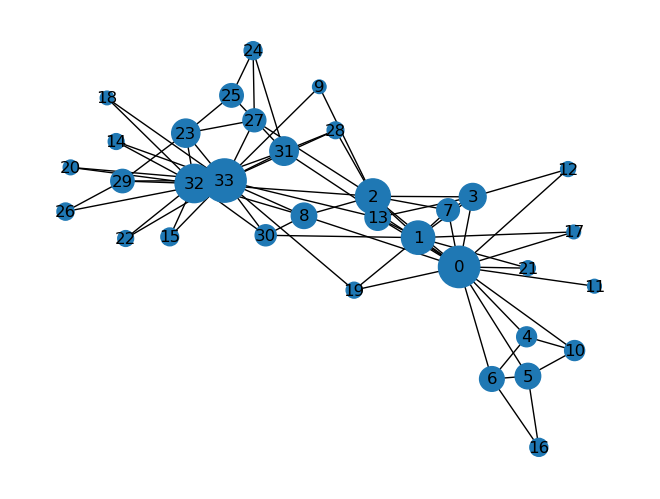

In [91]:
nx.draw(G,node_size=[i*10000 for i in nx.pagerank(G).values()],with_labels=True)

In [92]:
#diameter of a network
print([i for i in nx.shortest_path_length(G)])


[(0, {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 10: 1, 11: 1, 12: 1, 13: 1, 17: 1, 19: 1, 21: 1, 31: 1, 30: 2, 9: 2, 27: 2, 28: 2, 32: 2, 16: 2, 33: 2, 24: 2, 25: 2, 23: 3, 14: 3, 15: 3, 18: 3, 20: 3, 22: 3, 29: 3, 26: 3}), (1, {1: 0, 0: 1, 2: 1, 3: 1, 7: 1, 13: 1, 17: 1, 19: 1, 21: 1, 30: 1, 4: 2, 5: 2, 6: 2, 8: 2, 10: 2, 11: 2, 12: 2, 31: 2, 9: 2, 27: 2, 28: 2, 32: 2, 33: 2, 16: 3, 24: 3, 25: 3, 23: 3, 14: 3, 15: 3, 18: 3, 20: 3, 22: 3, 29: 3, 26: 3}), (2, {2: 0, 0: 1, 1: 1, 3: 1, 7: 1, 8: 1, 9: 1, 13: 1, 27: 1, 28: 1, 32: 1, 4: 2, 5: 2, 6: 2, 10: 2, 11: 2, 12: 2, 17: 2, 19: 2, 21: 2, 31: 2, 30: 2, 33: 2, 23: 2, 24: 2, 14: 2, 15: 2, 18: 2, 20: 2, 22: 2, 29: 2, 16: 3, 25: 3, 26: 3}), (3, {3: 0, 0: 1, 1: 1, 2: 1, 7: 1, 12: 1, 13: 1, 4: 2, 5: 2, 6: 2, 8: 2, 10: 2, 11: 2, 17: 2, 19: 2, 21: 2, 31: 2, 30: 2, 9: 2, 27: 2, 28: 2, 32: 2, 33: 2, 16: 3, 24: 3, 25: 3, 23: 3, 14: 3, 15: 3, 18: 3, 20: 3, 22: 3, 29: 3, 26: 3}), (4, {4: 0, 0: 1, 6: 1, 10: 1, 1: 2, 2: 2, 3: 2, 5: 2, 7: 2,

In [93]:
print(nx.diameter(G))
print(nx.density(G))
print(nx.number_connected_components(G))

5
0.13903743315508021
1


In [94]:
cliques = [i for i in nx.find_cliques(G)]
print(cliques)

[[0, 1, 17], [0, 1, 2, 3, 13], [0, 1, 2, 3, 7], [0, 1, 19], [0, 1, 21], [0, 4, 10], [0, 4, 6], [0, 5, 10], [0, 5, 6], [0, 8, 2], [0, 11], [0, 12, 3], [0, 31], [1, 30], [2, 32, 8], [2, 9], [2, 27], [2, 28], [5, 16, 6], [33, 32, 8, 30], [33, 32, 14], [33, 32, 15], [33, 32, 18], [33, 32, 20], [33, 32, 22], [33, 32, 23, 29], [33, 32, 31], [33, 9], [33, 13], [33, 19], [33, 26, 29], [33, 27, 23], [33, 28, 31], [24, 25, 31], [24, 27], [25, 23]]
